In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Understanding the data

In [81]:
cause_of_deaths_df = pd.read_csv("cause_of_deaths.csv")
cause_of_deaths_15_49_df = pd.read_csv("causes_of_death_in_15_49_year_olds.csv")
population_df = pd.read_csv("population.csv")

In [3]:
sweden = cause_of_deaths_df[cause_of_deaths_df["Country/Territory"] == "Sweden"].copy()
ukraine = cause_of_deaths_df[cause_of_deaths_df["Country/Territory"] == "Ukraine"].copy()

In [4]:
cause_of_deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

In [5]:
cause_of_deaths_df.describe()

,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
count,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,...,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6.120000e+03,6120.000000,6120.000000,6120.000000,6120.000000
mean,2004.500000,1719.701307,4864.189379,1173.169118,2253.600000,4140.960131,1683.333170,2083.797222,1262.589216,5941.898529,...,5138.704575,4724.132680,425.013399,1965.994281,5930.795588,1.709237e+04,6124.072059,10725.267157,588.711438,618.429902
std,8.656149,6672.006930,18220.659072,4616.156238,10483.633601,18427.753137,8877.018366,6917.006075,6057.973183,21011.962487,...,16773.081040,16470.429969,2022.640521,8255.999063,24097.784291,1.051572e+05,20688.118580,37228.051096,2128.595120,4186.023497
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,15.000000,90.000000,27.000000,9.000000,0.000000,34.000000,40.000000,5.000000,11.000000,...,236.000000,145.750000,6.000000,5.000000,174.750000,2.890000e+02,154.000000,284.000000,17.000000,2.000000
50%,2004.500000,109.000000,666.500000,164.000000,119.000000,0.000000,177.000000,265.000000,54.000000,136.000000,...,1087.000000,822.000000,52.500000,92.000000,966.500000,1.689000e+03,1210.000000,2185.000000,126.000000,15.000000
75%,2012.000000,847.250000,2456.250000,609.250000,1167.250000,393.000000,698.000000,877.000000,734.000000,1879.000000,...,2954.000000,2922.500000,254.000000,1042.500000,3435.250000,5.249750e+03,3547.250000,6080.000000,450.000000,160.000000
max,2019.000000,98358.000000,320715.000000,76990.000000,268223.000000,280604.000000,153773.000000,69640.000000,107929.000000,305491.000000,...,273089.000000,222922.000000,30883.000000,202241.000000,329237.000000,1.366039e+06,270037.000000,464914.000000,25876.000000,64305.000000


In [6]:
sweden

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
5220,Sweden,SWE,1990,63,3733,617,60,0,138,144,...,1466,649,71,42,937,2481,842,2894,122,4
5221,Sweden,SWE,1991,61,3889,692,64,0,142,159,...,1507,691,72,47,906,2570,861,2955,125,4
5222,Sweden,SWE,1992,53,4028,761,66,0,137,156,...,1530,718,68,49,863,2643,870,2993,122,4
5223,Sweden,SWE,1993,51,4155,826,69,0,138,146,...,1566,756,64,51,823,2744,870,2998,123,4
5224,Sweden,SWE,1994,47,4255,858,69,0,134,142,...,1534,766,59,52,791,2753,849,2940,120,4
5225,Sweden,SWE,1995,45,4382,913,70,0,132,133,...,1575,802,56,54,732,2864,856,2959,119,4
5226,Sweden,SWE,1996,44,4463,959,73,0,127,142,...,1600,835,50,56,696,2962,843,2960,119,3
5227,Sweden,SWE,1997,42,4479,988,79,0,131,134,...,1614,882,42,62,670,3047,828,2937,117,3
5228,Sweden,SWE,1998,42,4467,1015,82,0,129,137,...,1658,908,37,64,655,3155,842,2971,173,3
5229,Sweden,SWE,1999,42,4466,1038,89,0,129,140,...,1737,945,34,70,645,3259,857,3007,110,4


# EDA

In [7]:
sweden.drop(columns=["Code", "Country/Territory", "Malaria"], inplace=True)
sweden = sweden.set_index(pd.DatetimeIndex(pd.to_datetime(sweden["Year"], format="%Y")).to_period("Y")).drop(columns="Year")
sweden_total_deaths = sweden.sum().sum()

In [8]:
ukraine.drop(columns=["Code", "Country/Territory", "Malaria"], inplace=True)
ukraine = ukraine.set_index(pd.DatetimeIndex(pd.to_datetime(ukraine["Year"], format="%Y")).to_period("Y")).drop(columns="Year")
ukraine_total_deaths = ukraine.sum().sum()

In [9]:
population_sweden = population_df.loc[population_df["Entity"] == "Sweden"]
population_sweden = population_sweden.loc[(population_sweden["Year"] >= 1990) & (population_sweden["Year"] <= 2019)]
population_sweden = population_sweden.set_index(pd.DatetimeIndex(pd.to_datetime(population_sweden["Year"], format="%Y"))).to_period("Y")

In [10]:
population_ukraine = population_df.loc[population_df["Entity"] == "Ukraine"]
population_ukraine = population_ukraine.loc[(population_ukraine["Year"] >= 1990) & (population_ukraine["Year"] <= 2019)]
population_ukraine = population_ukraine.set_index(pd.DatetimeIndex(pd.to_datetime(population_ukraine["Year"], format="%Y"))).to_period("Y")

In [11]:
population_ukraine = population_ukraine.drop(columns=["Entity", "Code", "Year"])
population_sweden = population_sweden.drop(columns=["Entity", "Code", "Year"])

In [12]:
sweden_top_5_total = sweden.sum().sort_values(ascending=False)[:5]
ukraine_top_5_total = ukraine.sum().sort_values(ascending=False)[:5]

# Total Deaths Analysis

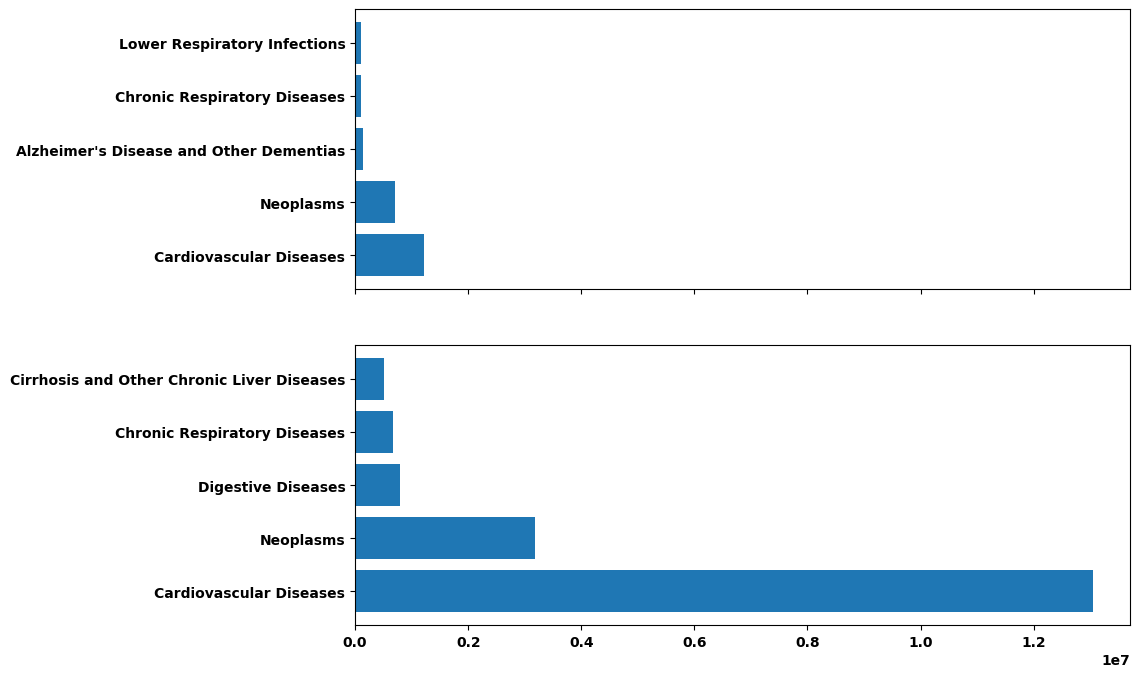

In [13]:
fig, ax = plt.subplots(2, figsize=(10, 8), sharex=True)

ax[0].barh(sweden_top_5_total.index, sweden_top_5_total.values)

ax[1].barh(ukraine_top_5_total.index, ukraine_top_5_total.values)

plt.show()

In [14]:
ukraine_top_5_total = ukraine_top_5_total.to_frame()
sweden_top_5_total = sweden_top_5_total.to_frame()
ukraine_top_5_total = ukraine_top_5_total.rename(columns={0: "Total Deaths"})
sweden_top_5_total = sweden_top_5_total.rename(columns={0: "Total Deaths"})

In [15]:
ukraine_total_5_percentage = (ukraine_top_5_total / ukraine_total_deaths) * 100
sweden_top_5_total_percentage = sweden_top_5_total / sweden_total_deaths * 100
ukraine_top_5_total["Percentage of Deaths"] = ukraine_total_5_percentage
sweden_top_5_total["Percentage of Deaths"] = sweden_top_5_total_percentage

In [16]:
sweden_top_5_total["Percentage of Deaths"][1]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16660\3396972217.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sweden_top_5_total["Percentage of Deaths"][1]


26.843609877334558

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16660\4263438880.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[0].text(sweden_top_5_total["Percentage of Deaths"][i] + 1, i, (str(round(sweden_top_5_total["Percentage of Deaths"][i])) + " %"), ha='left', va='center')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16660\4263438880.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[1].text(ukraine_top_5_total["Percentage of Deaths"][i] + 1, i, (str(round(ukraine_top_5_total["Percentage of Deaths"][i])) + " %"), ha='left', va='center')


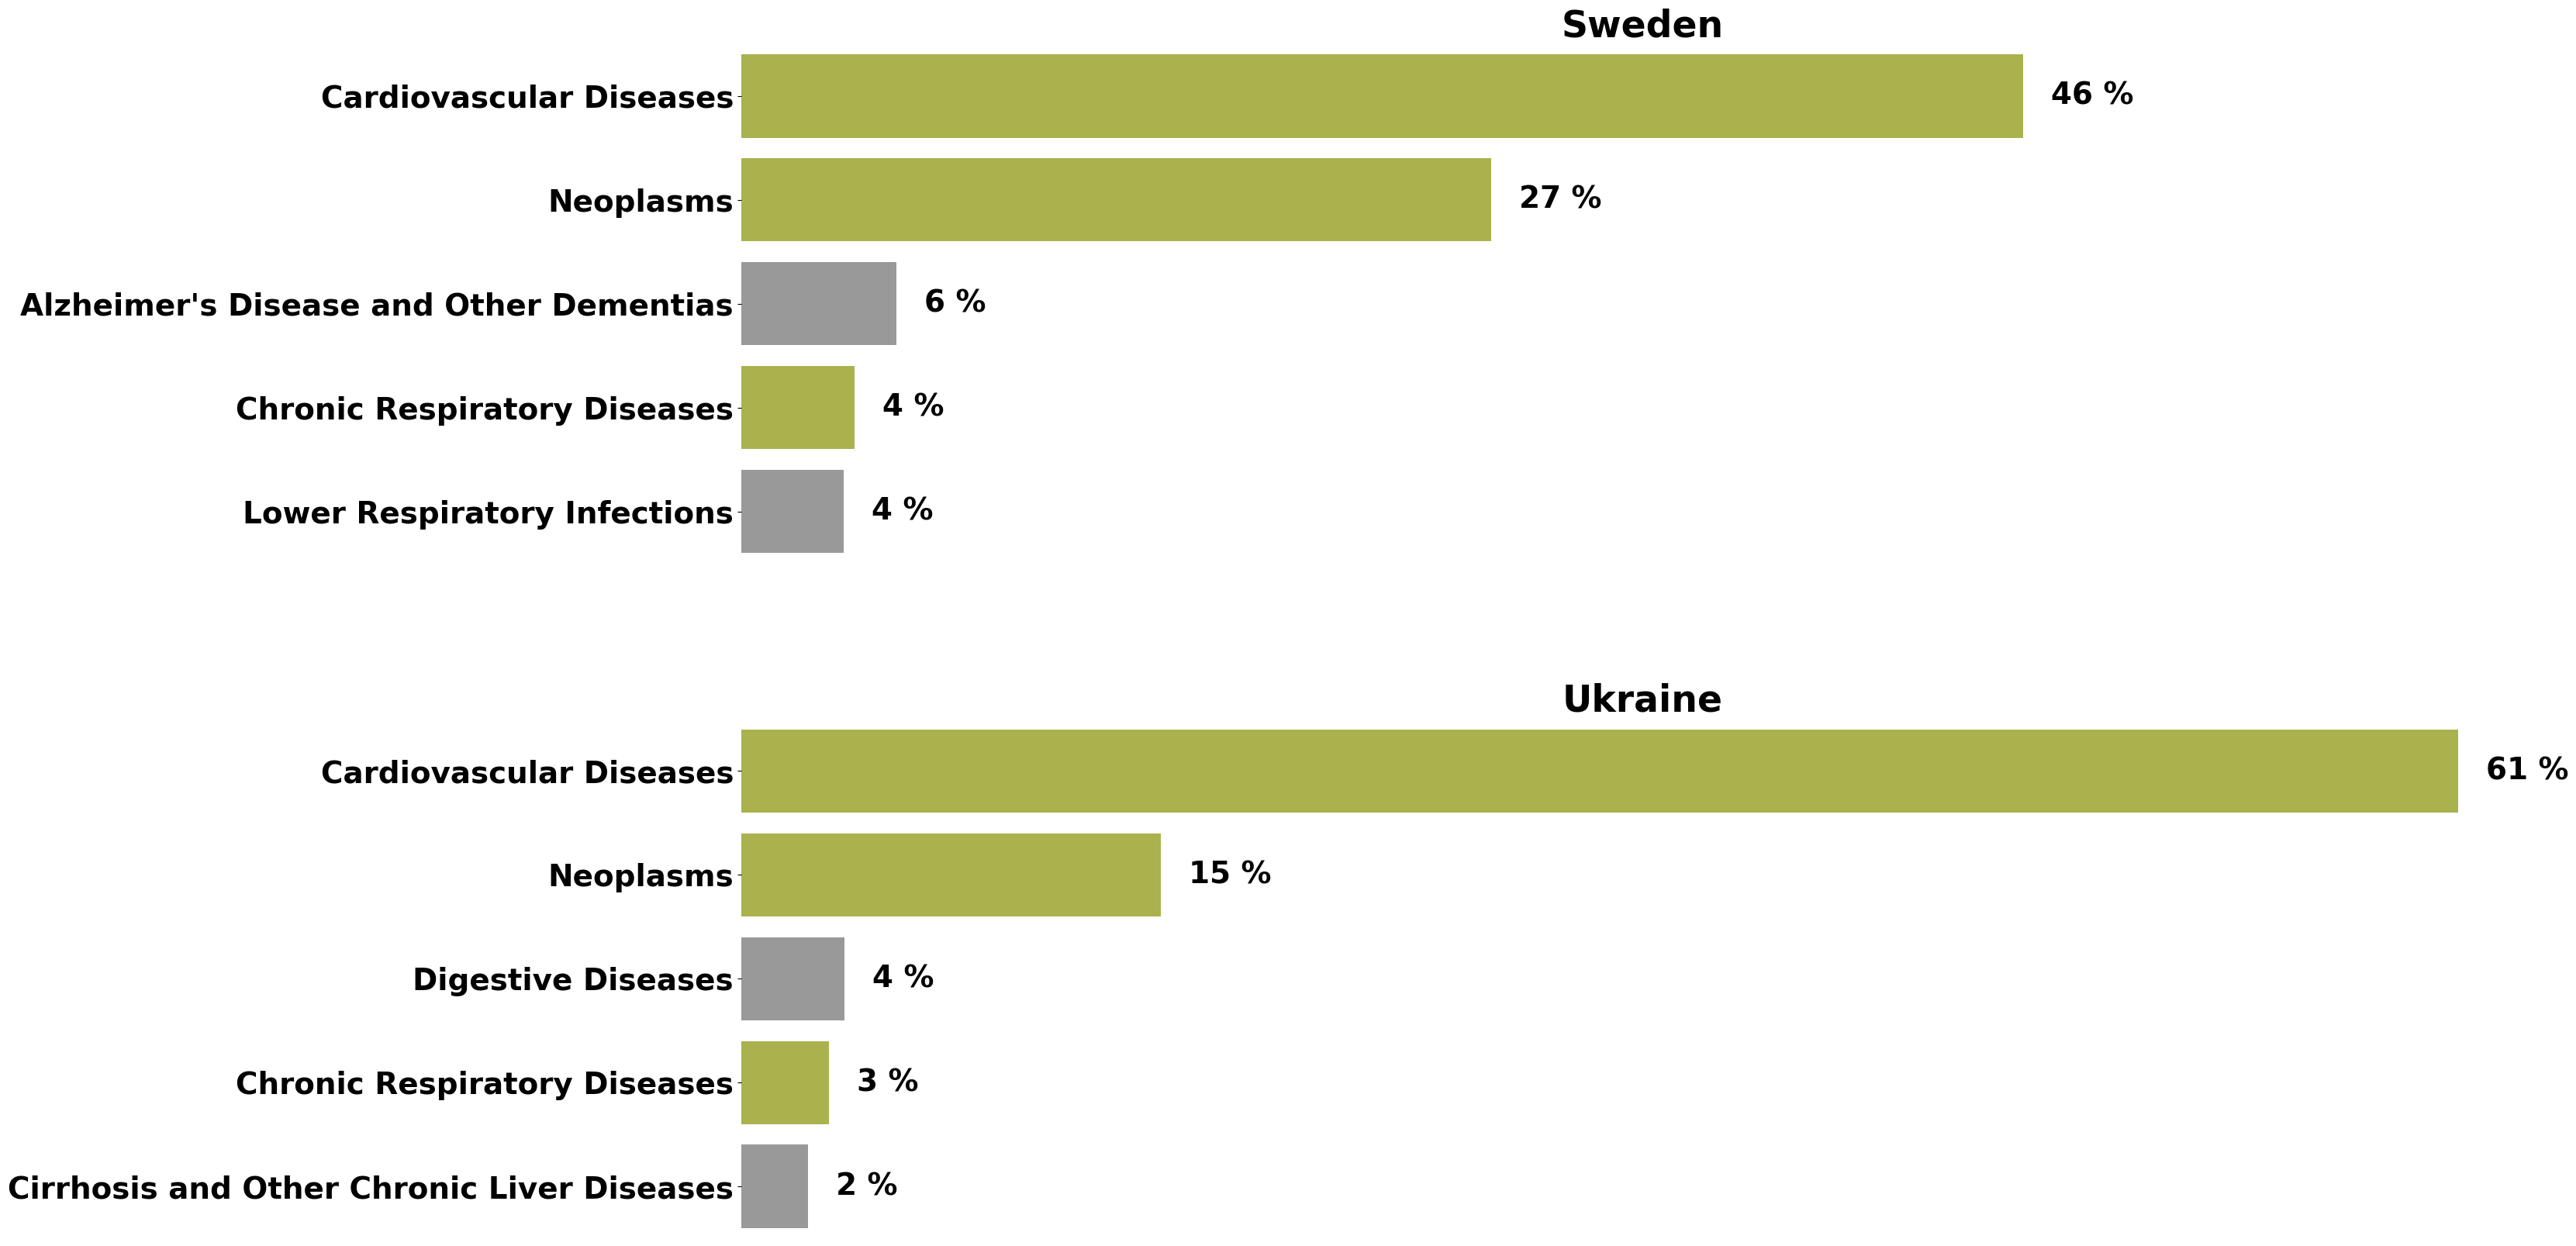

In [17]:
plt.rcParams.update({'font.size': 28})
y = "#B7C33C"
g = "#999999"
swe_colors = [y, y, g, y, g]
ukr_colors = [y, y, g, y, g]

fig, ax = plt.subplots(2, figsize=(30, 20), sharex=True)

sns.barplot(data=sweden_top_5_total, x="Percentage of Deaths", y=sweden_top_5_total.index, ax=ax[0], palette=swe_colors)
ax[0].set_title("Sweden", fontsize=34)
ax[0].set_xlabel('')

for i in range(len(sweden_top_5_total["Percentage of Deaths"])):
    ax[0].text(sweden_top_5_total["Percentage of Deaths"][i] + 1, i, (str(round(sweden_top_5_total["Percentage of Deaths"][i])) + " %"), ha='left', va='center')

sns.barplot(data=ukraine_top_5_total, x="Percentage of Deaths", y=ukraine_top_5_total.index, ax=ax[1], palette=ukr_colors)
ax[1].set_title("Ukraine", fontsize=34)
ax[1].set_xlabel('')

for i in range(len(ukraine_top_5_total["Percentage of Deaths"])):
    ax[1].text(ukraine_top_5_total["Percentage of Deaths"][i] + 1, i, (str(round(ukraine_top_5_total["Percentage of Deaths"][i])) + " %"), ha='left', va='center')
ax[1].set_xticks([])

sns.despine(top=True, bottom=True, left=True)
plt.subplots_adjust(hspace=0.3)
plt.savefig("top_diseases.png", bbox_inches="tight")
plt.show()

# Age 15-49 Analysis

In [18]:
cause_of_deaths_15_49_df

,Entity,Code,Year,Deaths - Self-harm - Sex: Both - Age: 15-49 years (Number),Deaths - Interpersonal violence - Sex: Both - Age: 15-49 years (Number),Deaths - Drowning - Sex: Both - Age: 15-49 years (Number),Deaths - Malaria - Sex: Both - Age: 15-49 years (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: 15-49 years (Number)",Deaths - Neoplasms - Sex: Both - Age: 15-49 years (Number),Deaths - Digestive diseases - Sex: Both - Age: 15-49 years (Number),...,Deaths - Protein-energy malnutrition - Sex: Both - Age: 15-49 years (Number),Deaths - Exposure to forces of nature - Sex: Both - Age: 15-49 years (Number),Deaths - Environmental heat and cold exposure - Sex: Both - Age: 15-49 years (Number),Deaths - Diarrheal diseases - Sex: Both - Age: 15-49 years (Number),Deaths - Road injuries - Sex: Both - Age: 15-49 years (Number),Deaths - Tuberculosis - Sex: Both - Age: 15-49 years (Number),Deaths - HIV/AIDS - Sex: Both - Age: 15-49 years (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: 15-49 years (Number),Deaths - Parkinson's disease - Sex: Both - Age: 15-49 years (Number),Deaths - Acute hepatitis - Sex: Both - Age: 15-49 years (Number)
0,Afghanistan,AFG,1990,482,1126,234,46,86,2078,731,...,131,0,73,42,2033,1208,15,5,10,553
1,Afghanistan,AFG,1991,535,1510,262,94,94,2183,773,...,143,543,52,46,2317,1289,19,5,10,595
2,Afghanistan,AFG,1992,634,1782,311,125,109,2386,853,...,165,266,27,54,2814,1446,24,5,10,671
3,Afghanistan,AFG,1993,716,2038,350,58,121,2544,917,...,184,103,31,77,3204,1575,28,5,10,737
4,Afghanistan,AFG,1994,759,2260,365,110,126,2615,948,...,194,73,33,64,3385,1653,32,5,11,776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,1460,1138,318,329,221,2362,1290,...,239,8,16,1293,1376,5018,19306,5,4,53
6836,Zimbabwe,ZWE,2016,1510,1174,324,250,225,2462,1325,...,239,16,16,1296,1411,4915,17630,5,4,53
6837,Zimbabwe,ZWE,2017,1543,1193,329,261,228,2549,1360,...,237,126,16,1306,1432,4808,15686,5,4,53
6838,Zimbabwe,ZWE,2018,1573,1224,333,261,231,2636,1381,...,238,0,16,1288,1456,4716,13698,6,4,51


In [19]:
pattern = r"Sex: Both - Age: 15-49 years"

In [20]:
sweden_15_49 = cause_of_deaths_15_49_df[cause_of_deaths_15_49_df["Entity"] == "Sweden"].drop(columns=["Entity", "Code"])
sweden_15_49 = sweden_15_49.set_index(pd.DatetimeIndex(pd.to_datetime(sweden_15_49["Year"], format="%Y")).to_period("Y")).drop(columns="Year")
sweden_15_49.columns = [column.replace(pattern, r"").split(" - ")[1].strip() for column in sweden_15_49.columns]

ukraine_15_49 = cause_of_deaths_15_49_df[cause_of_deaths_15_49_df["Entity"] == "Ukraine"].drop(columns=["Entity", "Code"])
ukraine_15_49 = ukraine_15_49.set_index(pd.DatetimeIndex(pd.to_datetime(ukraine_15_49["Year"], format="%Y")).to_period("Y")).drop(columns="Year")
ukraine_15_49.columns = [column.replace(pattern, r"").split(" - ")[1].strip() for column in ukraine_15_49.columns]

In [21]:
sweden_15_49.sum().sort_values(ascending=False)

Neoplasms                                     28801
Self-harm                                     21603
Cardiovascular diseases                       14815
Road injuries                                  8139
Drug use disorders                             5583
Digestive diseases                             3992
Alcohol use disorders                          2826
Cirrhosis and other chronic liver diseases     2566
Interpersonal violence                         2295
Diabetes mellitus                              1856
Lower respiratory infections                   1208
Drowning                                       1049
Chronic respiratory diseases                   1025
HIV/AIDS                                        859
Fire, heat, and hot substances                  615
Environmental heat and cold exposure            423
Chronic kidney disease                          388
Alzheimer's disease and other dementias         143
Tuberculosis                                     62
Diarrheal di

In [22]:
ukraine_15_49.sum().sort_values(ascending=False)

Cardiovascular diseases                       560022
Neoplasms                                     383803
Digestive diseases                            255539
Self-harm                                     244073
Cirrhosis and other chronic liver diseases    197863
Road injuries                                 180651
Alcohol use disorders                         161059
HIV/AIDS                                      156715
Interpersonal violence                        121728
Drowning                                       99651
Lower respiratory infections                   83034
Tuberculosis                                   57743
Environmental heat and cold exposure           52103
Fire, heat, and hot substances                 36657
Chronic respiratory diseases                   29887
Drug use disorders                             29038
Diabetes mellitus                              17002
Chronic kidney disease                          7976
Nutritional deficiencies                      

In [23]:
ukraine_top_5_total

,Total Deaths,Percentage of Deaths
Cardiovascular Diseases,13053052,61.439279
Neoplasms,3190335,15.016556
Digestive Diseases,786889,3.703800
Chronic Respiratory Diseases,670421,3.155598
Cirrhosis and Other Chronic Liver Diseases,509723,2.399210


In [24]:
general_diseases_15_49_ukraine = ukraine_15_49[['Cardiovascular diseases', 'Neoplasms', 'Chronic respiratory diseases']].sum()
general_diseases_ukraine = ukraine_top_5_total.loc[["Cardiovascular Diseases", "Neoplasms", "Chronic Respiratory Diseases"]]["Total Deaths"]
general_diseases_15_49_ukraine.index = general_diseases_15_49_ukraine.index.str.title()
general_diseases_ukraine.index = general_diseases_ukraine.index.str.title()

general_diseases_15_49_sweden = sweden_15_49[['Cardiovascular diseases', 'Neoplasms', 'Chronic respiratory diseases']].sum()
general_diseases_sweden = sweden_top_5_total.loc[["Cardiovascular Diseases", "Neoplasms", "Chronic Respiratory Diseases"]]["Total Deaths"]
general_diseases_15_49_sweden.index = general_diseases_15_49_sweden.index.str.title()
general_diseases_sweden.index = general_diseases_sweden.index.str.title()

In [25]:
general_diseases_ukraine
general_diseases_sweden

Cardiovascular Diseases         1213946
Neoplasms                        710254
Chronic Respiratory Diseases     107028
Name: Total Deaths, dtype: int64

In [26]:
general_diseases_15_49_ukraine
general_diseases_15_49_sweden

Cardiovascular Diseases         14815
Neoplasms                       28801
Chronic Respiratory Diseases     1025
dtype: int64

In [27]:
general_dis_perc_15_49_ukraine = (general_diseases_15_49_ukraine / general_diseases_ukraine) * 100
general_dis_perc_15_49_sweden = (general_diseases_15_49_sweden / general_diseases_sweden) * 100

In [28]:
general_dis_perc_15_49_ukraine = round(general_dis_perc_15_49_ukraine, 2)
general_dis_perc_15_49_ukraine

Cardiovascular Diseases          4.29
Neoplasms                       12.03
Chronic Respiratory Diseases     4.46
dtype: float64

In [29]:
general_dis_perc_15_49_sweden = round(general_dis_perc_15_49_sweden, 2)
general_dis_perc_15_49_sweden

Cardiovascular Diseases         1.22
Neoplasms                       4.06
Chronic Respiratory Diseases    0.96
dtype: float64

In [30]:
sweden_top_3_general = sweden_top_5_total.loc[["Cardiovascular Diseases", "Neoplasms", "Chronic Respiratory Diseases"]]
ukraine_top_3_general = ukraine_top_5_total.loc[["Cardiovascular Diseases", "Neoplasms", "Chronic Respiratory Diseases"]]

In [31]:
sweden_top_3_general

,Total Deaths,Percentage of Deaths
Cardiovascular Diseases,1213946,45.880337
Neoplasms,710254,26.843610
Chronic Respiratory Diseases,107028,4.045057


In [32]:
general_dis_perc_15_49_sweden.values

array([1.22, 4.06, 0.96])

In [33]:
general_dis_perc_15_49_sweden

Cardiovascular Diseases         1.22
Neoplasms                       4.06
Chronic Respiratory Diseases    0.96
dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16660\2702160991.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels([f'{int(x)} %' for x in x_vals])


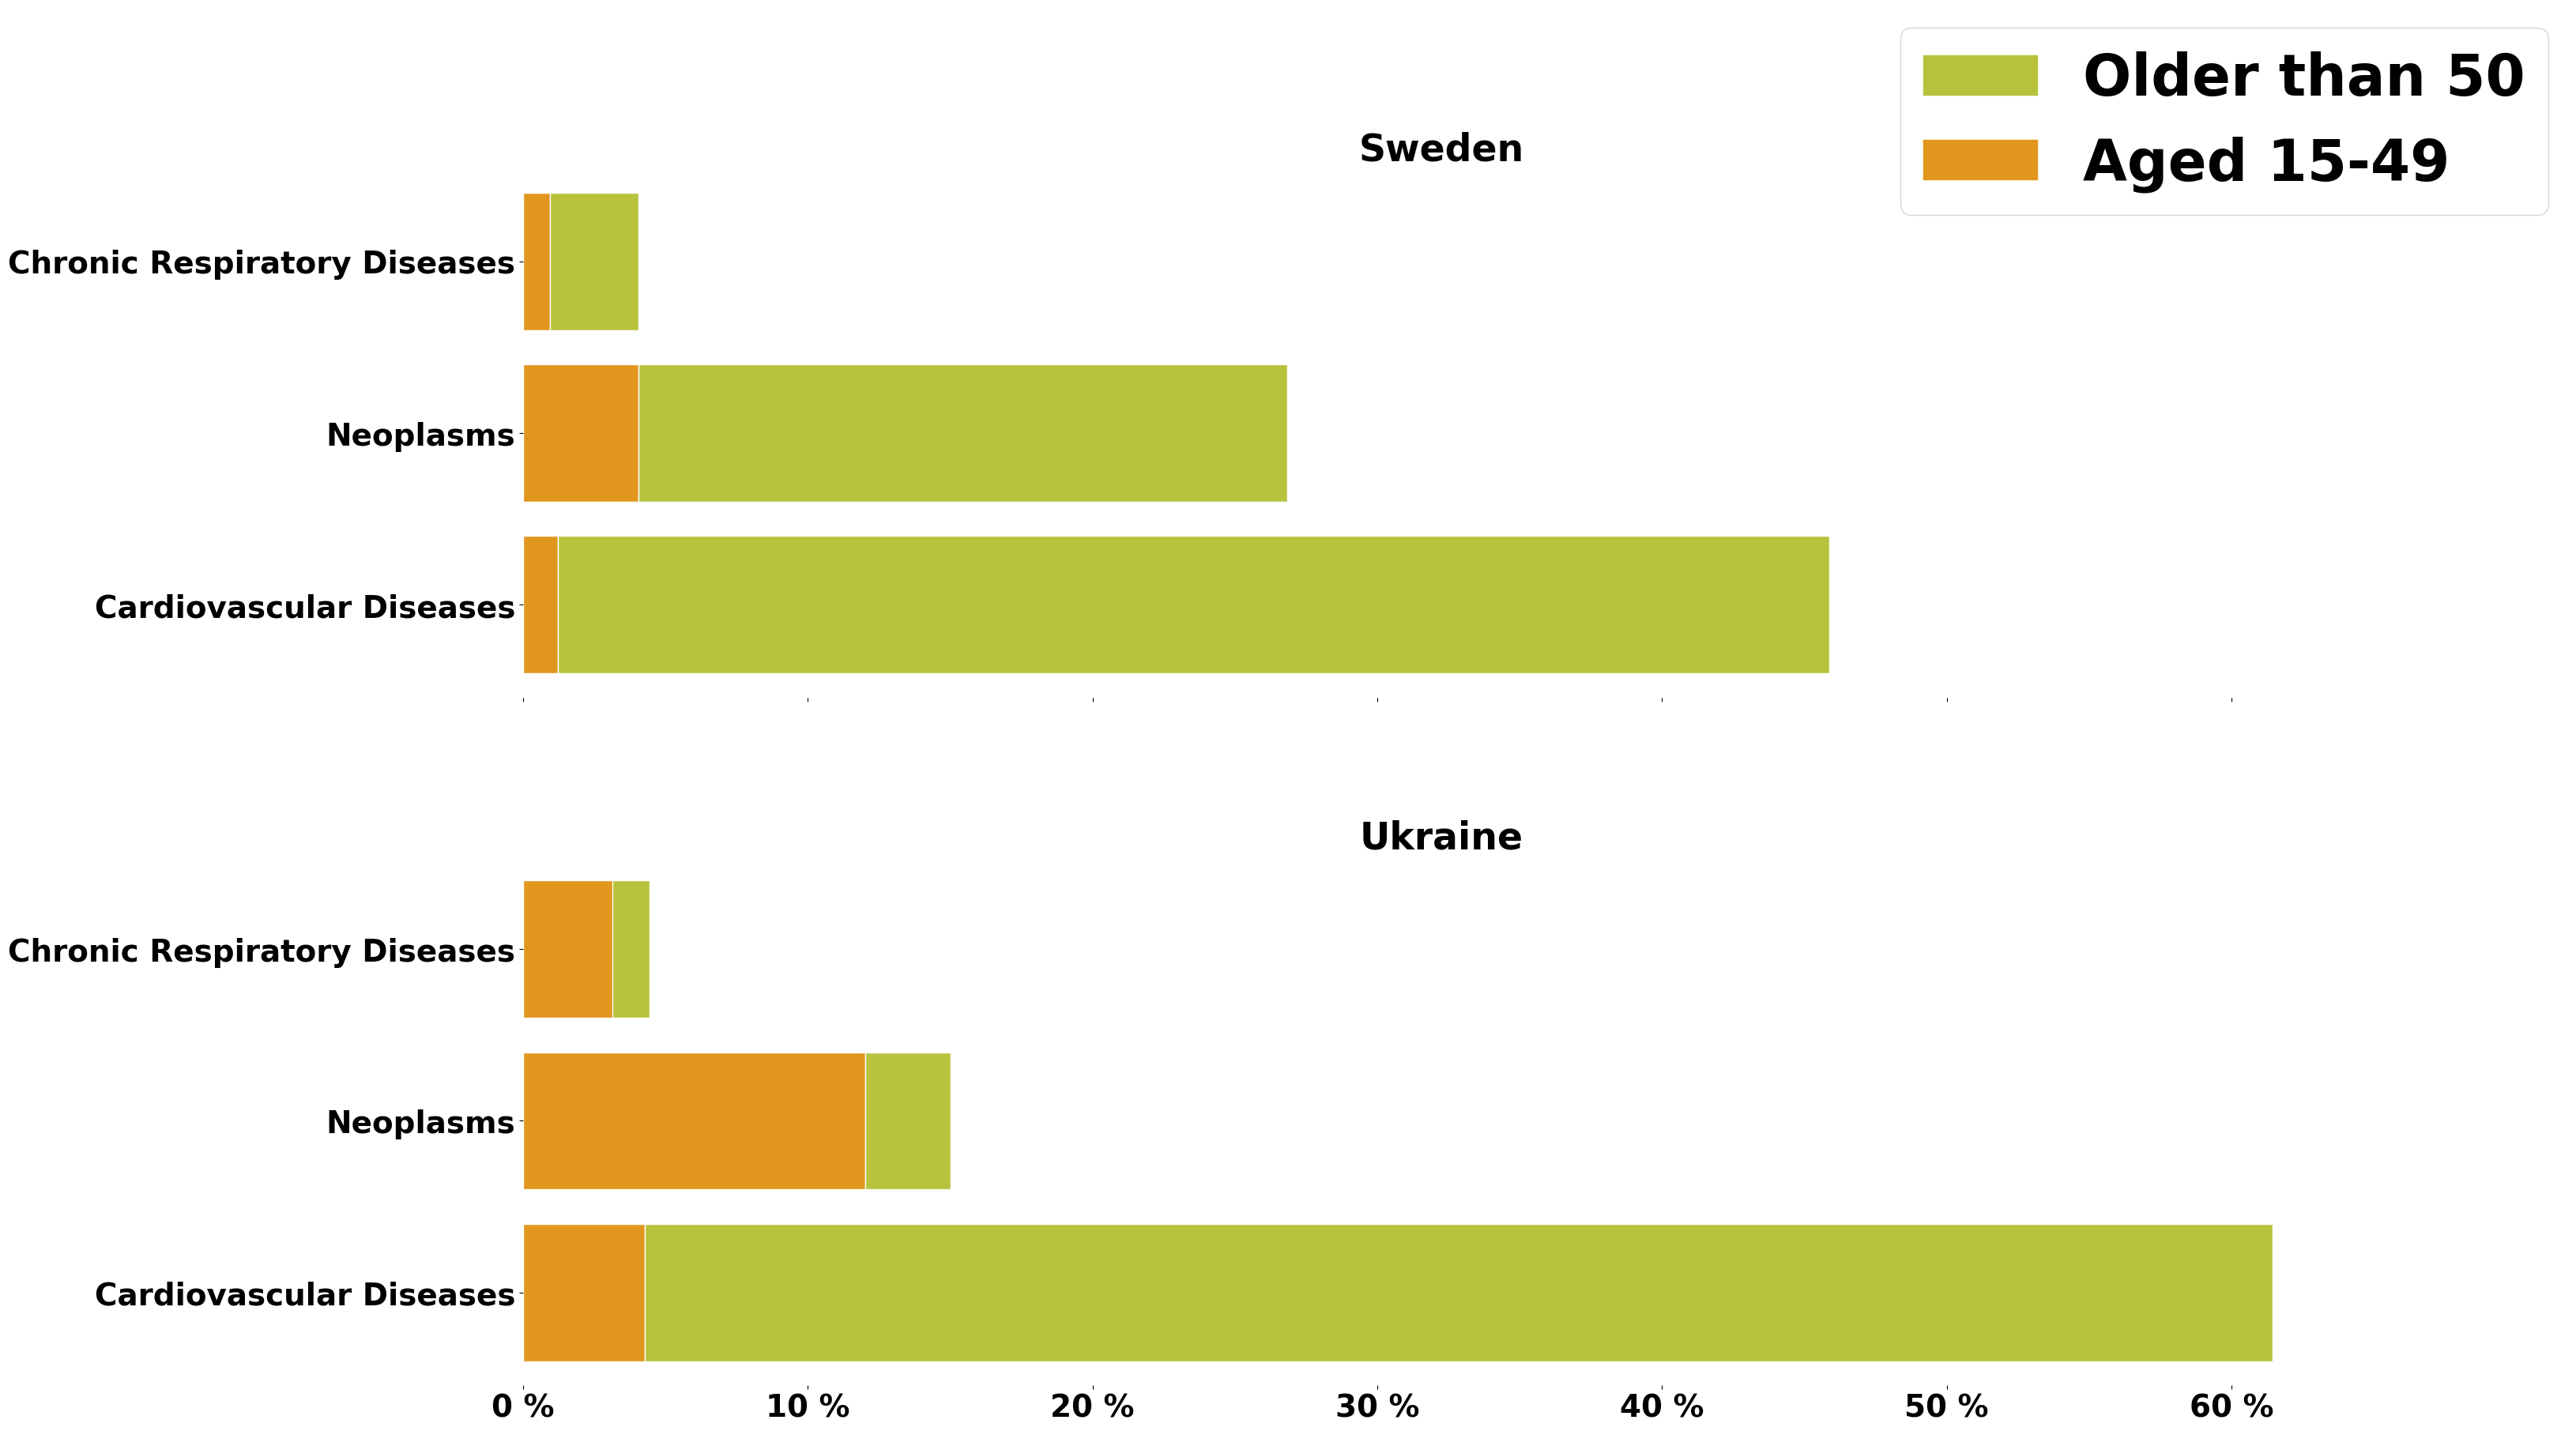

In [89]:
plt.rcParams.update({'font.size': 28})
y = "#B7C33C"

swe_colors = [y, y, y]
ukr_colors = [y, y, y]

fig, ax = plt.subplots(2, figsize=(30, 20), sharex=True)


swe_bars = []
swe_bars.append(ax[0].barh(width=general_dis_perc_15_49_sweden.values, y=general_dis_perc_15_49_sweden.index, color="#E1971E", edgecolor="white"))
swe_bars.append(ax[0].barh(width=sweden_top_3_general["Percentage of Deaths"]-general_dis_perc_15_49_sweden, y=sweden_top_3_general.index, left=general_dis_perc_15_49_sweden, color=y, edgecolor="white"))

ukr_bars = []
ukr_bars.append(ax[1].barh(width=general_dis_perc_15_49_ukraine.values, y=general_dis_perc_15_49_ukraine.index, color="#E1971E", edgecolor="white"))
ukr_bars.append(ax[1].barh(width=ukraine_top_3_general["Percentage of Deaths"]-general_dis_perc_15_49_ukraine, y=ukraine_top_3_general.index, left=general_dis_perc_15_49_ukraine, color=y, edgecolor="white"))

ax[0].set_title("Sweden", fontsize=34)

ax[1].set_title("Ukraine", fontsize=34)

x_vals = ax[1].get_xticks()
ax[1].set_xticklabels([f'{int(x)} %' for x in x_vals])
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in swe_colors]
# Separate colors for legend
from matplotlib.patches import Patch

# Create proxy artists for legend
# Create proxy artists for legend
legend_handles = [Patch(color=color) for color in ["#B7C33C", "#E1971E"]]

# Create legend
fig.legend(legend_handles, legend_labels, loc='upper right', fontsize=52)

sns.despine(top=True, bottom=True, left=True)
plt.subplots_adjust(hspace=0.3)
plt.savefig("general_3_dis.png", bbox_inches="tight")
plt.show()

In [35]:
sweden_avg_pop = population_sweden.mean()
ukraine_avg_pop = population_ukraine.mean()

In [36]:
avg_death_15_49_sweden = sweden_15_49.mean().sort_values(ascending=False)
avg_death_15_49_sweden = avg_death_15_49_sweden[["Cardiovascular diseases", "Neoplasms", "Chronic respiratory diseases"]]

avg_death_15_49_ukraine = ukraine_15_49.mean().sort_values(ascending=False)
avg_death_15_49_ukraine = avg_death_15_49_ukraine[["Cardiovascular diseases", "Neoplasms", "Chronic respiratory diseases"]]

In [37]:
avg_death_15_49_sweden

Cardiovascular diseases         493.833333
Neoplasms                       960.033333
Chronic respiratory diseases     34.166667
dtype: float64

In [38]:
avg_death_15_49_ukraine

Cardiovascular diseases         18667.400000
Neoplasms                       12793.433333
Chronic respiratory diseases      996.233333
dtype: float64

In [39]:
(avg_death_15_49_sweden["Cardiovascular diseases"] / sweden_avg_pop) * 100_000

Population (historical estimates)    5.371204
dtype: float64

In [40]:
(avg_death_15_49_ukraine["Cardiovascular diseases"] / ukraine_avg_pop) * 100_000

Population (historical estimates)    39.126759
dtype: float64

In [41]:
(avg_death_15_49_sweden["Neoplasms"] / sweden_avg_pop) * 100_000

Population (historical estimates)    10.441853
dtype: float64

In [42]:
(avg_death_15_49_ukraine["Neoplasms"] / ukraine_avg_pop) * 100_000

Population (historical estimates)    26.81496
dtype: float64

In [43]:
(avg_death_15_49_sweden["Chronic respiratory diseases"] / sweden_avg_pop) * 100_000

Population (historical estimates)    0.371616
dtype: float64

In [44]:
(avg_death_15_49_ukraine["Chronic respiratory diseases"] / ukraine_avg_pop) * 100_000

Population (historical estimates)    2.088099
dtype: float64

# Добавить в презентацию:

### Проанализировав эти три основных заболевания я обнаружил что все они имеют общие причины возникновения:
### Курение
### Алкоголь
### Качество воздуха
### Продукты